In [302]:
import pandas as pd

In [303]:
df = pd.read_csv('../data/loan_200k.csv' , low_memory=False)  
# df = pd.read_csv('../data/loan.csv' , low_memory=False)  



In [304]:
leak_cols = [c for c in df.columns if "pymnt" in c or "recover" in c or "hardship" in c or "settlement" in c or 'total_rec' in c or 'out_prncp' in c  or 'last_pymnt' in c or 'next_pymnt' in c or 'last_credit_pull_d' in c]
leak_cols

['pymnt_plan',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [305]:
df.drop(columns=leak_cols, inplace=True)
df.drop(columns=['id', 'member_id', 'url', 'desc'], inplace=True)


In [306]:
target = df['loan_status'].copy()
df.drop(columns=['loan_status'], inplace=True)

In [307]:
df.isna().sum().to_dict()

{'loan_amnt': 0,
 'funded_amnt': 0,
 'funded_amnt_inv': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 29627,
 'emp_length': 17852,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'purpose': 0,
 'title': 0,
 'zip_code': 0,
 'addr_state': 0,
 'dti': 392,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 112455,
 'mths_since_last_record': 175701,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 231,
 'total_acc': 0,
 'initial_list_status': 0,
 'collections_12_mths_ex_med': 0,
 'mths_since_last_major_derog': 154505,
 'policy_code': 0,
 'application_type': 0,
 'annual_inc_joint': 173067,
 'dti_joint': 173067,
 'verification_status_joint': 176311,
 'acc_now_delinq': 0,
 'tot_coll_amt': 0,
 'tot_cur_bal': 0,
 'open_acc_6m': 0,
 'open_act_il': 0,
 'open_il_12m': 0,
 'open_il_24m': 0,
 'mths_since_rcnt_il': 7112,
 'total_bal_il': 0,
 'il_util': 31809,
 'open

In [308]:
# df = df[df['payment_plan_start_date'].notna()]
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,payment_plan_start_date,orig_projected_additional_accrued_interest,disbursement_method
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,6025,6025,6025.0,36 months,15.02,208.92,C,C3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
199996,10000,10000,10000.0,36 months,6.11,304.72,A,A1,NaN,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DirectPay
199997,10000,10000,10000.0,36 months,7.84,312.63,A,A4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DirectPay
199998,35000,35000,35000.0,36 months,11.06,1146.85,B,B3,Financial Analyst,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash


In [309]:
df.dtypes.to_dict()

{'loan_amnt': dtype('int64'),
 'funded_amnt': dtype('int64'),
 'funded_amnt_inv': dtype('float64'),
 'term': dtype('O'),
 'int_rate': dtype('float64'),
 'installment': dtype('float64'),
 'grade': dtype('O'),
 'sub_grade': dtype('O'),
 'emp_title': dtype('O'),
 'emp_length': dtype('O'),
 'home_ownership': dtype('O'),
 'annual_inc': dtype('float64'),
 'verification_status': dtype('O'),
 'issue_d': dtype('O'),
 'purpose': dtype('O'),
 'title': dtype('O'),
 'zip_code': dtype('O'),
 'addr_state': dtype('O'),
 'dti': dtype('float64'),
 'delinq_2yrs': dtype('int64'),
 'earliest_cr_line': dtype('O'),
 'inq_last_6mths': dtype('int64'),
 'mths_since_last_delinq': dtype('float64'),
 'mths_since_last_record': dtype('float64'),
 'open_acc': dtype('int64'),
 'pub_rec': dtype('int64'),
 'revol_bal': dtype('int64'),
 'revol_util': dtype('float64'),
 'total_acc': dtype('int64'),
 'initial_list_status': dtype('O'),
 'collections_12_mths_ex_med': dtype('int64'),
 'mths_since_last_major_derog': dtype('flo

### class distribution of loan status

In [310]:
target.value_counts()

loan_status
Current               190319
Fully Paid              6958
Late (31-120 days)      1243
In Grace Period          912
Late (16-30 days)        340
Charged Off              228
Name: count, dtype: int64

In [311]:
loan_status_class = target.value_counts(normalize=True)

loan_status
Current               0.951595
Fully Paid            0.034790
Late (31-120 days)    0.006215
In Grace Period       0.004560
Late (16-30 days)     0.001700
Charged Off           0.001140
Name: proportion, dtype: float64

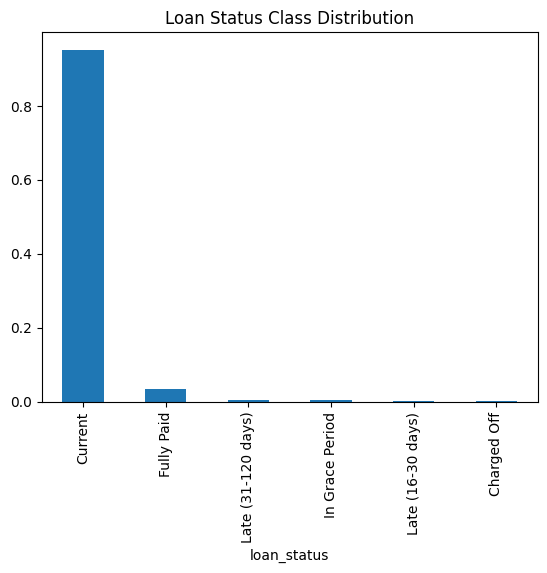

In [312]:
loan_status_class.plot(kind='bar', title='Loan Status Class Distribution')
loan_status_class

In [313]:
y = target.apply(lambda x: 1 if x in ['Charged Off', 'Default', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'] else 0)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,payment_plan_start_date,orig_projected_additional_accrued_interest,disbursement_method
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,6025,6025,6025.0,36 months,15.02,208.92,C,C3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
199996,10000,10000,10000.0,36 months,6.11,304.72,A,A1,NaN,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DirectPay
199997,10000,10000,10000.0,36 months,7.84,312.63,A,A4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DirectPay
199998,35000,35000,35000.0,36 months,11.06,1146.85,B,B3,Financial Analyst,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash


In [314]:
target

0         Current
1         Current
2         Current
3         Current
4         Current
           ...   
199995    Current
199996    Current
199997    Current
199998    Current
199999    Current
Name: loan_status, Length: 200000, dtype: object

In [315]:

df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,payment_plan_start_date,orig_projected_additional_accrued_interest,disbursement_method
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,6025,6025,6025.0,36 months,15.02,208.92,C,C3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
199996,10000,10000,10000.0,36 months,6.11,304.72,A,A1,NaN,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DirectPay
199997,10000,10000,10000.0,36 months,7.84,312.63,A,A4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DirectPay
199998,35000,35000,35000.0,36 months,11.06,1146.85,B,B3,Financial Analyst,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash


In [316]:
temp = df[df.isna() == True]
temp.isna().sum().to_dict()


{'loan_amnt': 200000,
 'funded_amnt': 200000,
 'funded_amnt_inv': 200000,
 'term': 200000,
 'int_rate': 200000,
 'installment': 200000,
 'grade': 200000,
 'sub_grade': 200000,
 'emp_title': 200000,
 'emp_length': 200000,
 'home_ownership': 200000,
 'annual_inc': 200000,
 'verification_status': 200000,
 'issue_d': 200000,
 'purpose': 200000,
 'title': 200000,
 'zip_code': 200000,
 'addr_state': 200000,
 'dti': 200000,
 'delinq_2yrs': 200000,
 'earliest_cr_line': 200000,
 'inq_last_6mths': 200000,
 'mths_since_last_delinq': 200000,
 'mths_since_last_record': 200000,
 'open_acc': 200000,
 'pub_rec': 200000,
 'revol_bal': 200000,
 'revol_util': 200000,
 'total_acc': 200000,
 'initial_list_status': 200000,
 'collections_12_mths_ex_med': 200000,
 'mths_since_last_major_derog': 200000,
 'policy_code': 200000,
 'application_type': 200000,
 'annual_inc_joint': 200000,
 'dti_joint': 200000,
 'verification_status_joint': 200000,
 'acc_now_delinq': 200000,
 'tot_coll_amt': 200000,
 'tot_cur_bal': 

In [317]:
thres = 0.7
na_frac = df.isna().sum() / len(df)
cols_to_drop = na_frac[na_frac > thres].index
cols_to_drop

Index(['mths_since_last_record', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq',
       'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'deferral_term',
       'payment_plan_start_date',
       'orig_projected_additional_accrued_interest'],
      dtype='object')

In [318]:
df = df.drop(columns=cols_to_drop)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,3,100.0,0.0,1,0,60124,16901,36500,18124,Cash
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,6,95.0,0.0,1,0,372872,99468,15000,94072,Cash
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0,100.0,0.0,0,0,136927,11749,13800,10000,Cash
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,3,100.0,100.0,0,0,385183,36151,5000,44984,Cash
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,5,92.3,0.0,0,0,157548,29674,9300,32332,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,6025,6025,6025.0,36 months,15.02,208.92,C,C3,NaN,NaN,...,2,76.9,66.7,0,0,8900,5385,4700,0,Cash
199996,10000,10000,10000.0,36 months,6.11,304.72,A,A1,NaN,< 1 year,...,0,94.1,16.7,0,0,63489,36951,22900,35689,DirectPay
199997,10000,10000,10000.0,36 months,7.84,312.63,A,A4,NaN,NaN,...,2,100.0,0.0,1,0,14200,9351,13600,0,DirectPay
199998,35000,35000,35000.0,36 months,11.06,1146.85,B,B3,Financial Analyst,10+ years,...,3,91.4,25.0,0,0,100500,48957,32100,50000,Cash


In [319]:
df['term'] = df['term'].str.replace(' months', '').astype(int)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,2500,2500,2500.0,36,13.56,84.92,C,C1,Chef,10+ years,...,3,100.0,0.0,1,0,60124,16901,36500,18124,Cash
1,30000,30000,30000.0,60,18.94,777.23,D,D2,Postmaster,10+ years,...,6,95.0,0.0,1,0,372872,99468,15000,94072,Cash
2,5000,5000,5000.0,36,17.97,180.69,D,D1,Administrative,6 years,...,0,100.0,0.0,0,0,136927,11749,13800,10000,Cash
3,4000,4000,4000.0,36,18.94,146.51,D,D2,IT Supervisor,10+ years,...,3,100.0,100.0,0,0,385183,36151,5000,44984,Cash
4,30000,30000,30000.0,60,16.14,731.78,C,C4,Mechanic,10+ years,...,5,92.3,0.0,0,0,157548,29674,9300,32332,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,6025,6025,6025.0,36,15.02,208.92,C,C3,NaN,NaN,...,2,76.9,66.7,0,0,8900,5385,4700,0,Cash
199996,10000,10000,10000.0,36,6.11,304.72,A,A1,NaN,< 1 year,...,0,94.1,16.7,0,0,63489,36951,22900,35689,DirectPay
199997,10000,10000,10000.0,36,7.84,312.63,A,A4,NaN,NaN,...,2,100.0,0.0,1,0,14200,9351,13600,0,DirectPay
199998,35000,35000,35000.0,36,11.06,1146.85,B,B3,Financial Analyst,10+ years,...,3,91.4,25.0,0,0,100500,48957,32100,50000,Cash


In [320]:
df['emp_length'] = df['emp_length'].str.replace(' years', '').str.replace(' year', '').str.replace('< 1', '0').str.replace('10+', '10').astype(float)
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_re

In [321]:
na_sum = df.isna().sum()
na_sum_dict = na_sum[na_sum > 0].to_dict()

In [322]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 

In [323]:
for col in numerical_cols:
    if col in na_sum_dict:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
for col in categorical_cols:
    if col in na_sum_dict:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

In [324]:
df.isna().sum().to_dict()

{'loan_amnt': 0,
 'funded_amnt': 0,
 'funded_amnt_inv': 0,
 'term': 0,
 'int_rate': 0,
 'installment': 0,
 'grade': 0,
 'sub_grade': 0,
 'emp_title': 0,
 'emp_length': 0,
 'home_ownership': 0,
 'annual_inc': 0,
 'verification_status': 0,
 'issue_d': 0,
 'purpose': 0,
 'title': 0,
 'zip_code': 0,
 'addr_state': 0,
 'dti': 0,
 'delinq_2yrs': 0,
 'earliest_cr_line': 0,
 'inq_last_6mths': 0,
 'mths_since_last_delinq': 0,
 'open_acc': 0,
 'pub_rec': 0,
 'revol_bal': 0,
 'revol_util': 0,
 'total_acc': 0,
 'initial_list_status': 0,
 'collections_12_mths_ex_med': 0,
 'policy_code': 0,
 'application_type': 0,
 'acc_now_delinq': 0,
 'tot_coll_amt': 0,
 'tot_cur_bal': 0,
 'open_acc_6m': 0,
 'open_act_il': 0,
 'open_il_12m': 0,
 'open_il_24m': 0,
 'mths_since_rcnt_il': 0,
 'total_bal_il': 0,
 'il_util': 0,
 'open_rv_12m': 0,
 'open_rv_24m': 0,
 'max_bal_bc': 0,
 'all_util': 0,
 'total_rev_hi_lim': 0,
 'inq_fi': 0,
 'total_cu_tl': 0,
 'inq_last_12m': 0,
 'acc_open_past_24mths': 0,
 'avg_cur_bal': 0

In [325]:
low_cardinal_cols = df[categorical_cols].nunique().sort_values().to_dict()
low_cardinal_cols.keys()

dict_keys(['initial_list_status', 'application_type', 'disbursement_method', 'verification_status', 'home_ownership', 'issue_d', 'grade', 'purpose', 'title', 'sub_grade', 'addr_state', 'earliest_cr_line', 'zip_code', 'emp_title'])

In [326]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_re

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


X = df.copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop="first"), categorical_cols),
        ('num', 'passthrough', numerical_cols),
    ]   
)

model = Pipeline(
    steps=[
        ('preprocess', preprocess),
        ('model', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced') ),
    ]
)       

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model Accuracy:", model.score(X_test, y_test))
print("Feature Importances:", model.named_steps['model'].feature_importances_)

